## Simple EDA Project 2


### Summary

- There are no missing values in both train ans test dataset.
- The train consists of 1000000 data, and the test consists of 500000 data.
- almost of `f0`~`f241` : continuous feature (240)
- **`f22`, `f43`**, `f242` ~ `f284` : binary feature (45)
- The value of target is 0 or 1.
- The value of target is almost half-and-half.

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Since there are many columns, you need to configure it for EDA to be convenient.

In [ ]:
# matplotlib setting
mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# pandas setting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
train = pd.read_csv('../input/tabular-playground-series-oct-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-oct-2021/test.csv')
sample_submission = pd.read_csv('../input/tabular-playground-series-oct-2021/sample_submission.csv')

Since there is too much data, it would be better to minimize the time for file input/output by using a library such as `datable`.

- [datable](https://github.com/h2oai/datatable)
    - example notebook : [@SRK : Getting started with Python datatable](https://www.kaggle.com/sudalairajkumar/getting-started-with-python-datatable)

In [ ]:
print(train.shape)
print(test.shape)

train.head()

(1000000, 287)
(500000, 286)


,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,0.147295,0.026177,0.106613,0.200924,0.713191,0.155750,0.557335,0.341702,0.285720,0.230396,0.203957,0.509588,0.706972,1,0.007793,0.247765,0.263750,0.259555,0.231730,0.138379,0.197824,0.054392,0.194153,0.281500,0.034818,0.025334,0.114432,0.139203,0.246157,0.251371,0.701423,0.301182,0.193924,0.267497,0,0.193430,0.238630,0.154770,0.249857,0.210685,0.406662,0.214810,0.258668,0.377518,0.192042,0.340855,0.199660,0.264074,0.205550,0.075109,0.205688,0.178962,0.245008,0.519336,0.306419,0.127139,0.367479,0.236380,0.195694,0.013195,0.199588,0.283367,0.168824,0.004855,0.117723,0.257688,0.197262,0.211452,0.372637,0.198157,0.689970,0.449955,0.713110,0.212041,0.183619,0.288667,0.648678,0.600398,0.223267,0.590163,0.248847,0.795641,0.139932,0.618696,0.639142,0.008549,0.559151,0.573640,0.138808,0.499156,0.112203,0.181498,0.165887,0.093171,0.106952,0.127861,0.250924,0.501673,0.036740,0.111361,0.075918,0.019444,0.250760,0.465093,0.087502,0.004185,0.195936,0.166389,0.171328,0.146014,0.199232,0.133999,0.168191,0.010242,0.294490,0.012977,0.003969,0.013739,0.040076,0.170711,0.250246,0.195538,0.708556,0.448925,0.550352,0.217984,0.751629,0.822459,0.186298,0.024197,0.044097,0.078943,0.181147,0.022591,0.576712,0.406843,0.510578,0.799434,0.651125,0.460708,0.636714,0.350704,0.872989,0.007751,0.017103,0.019875,0.203042,0.864594,0.595877,0.542969,0.990250,0.020373,0.006238,0.011040,0.006019,0.407014,0.080140,0.013502,0.144265,0.007229,0.003256,0.014556,0.123806,0.133871,0.011531,0.010250,0.253750,0.090162,0.147857,0.303087,0.112764,0.104344,0.168583,0.011342,0.239028,0.008018,0.167653,0.217342,0.184178,0.179060,0.078009,0.135768,0.006534,0.009832,0.013317,0.390079,0.004801,0.056600,0.114139,0.012599,0.014818,0.446073,0.216079,0.152113,0.111237,0.170896,0.190477,0.011936,0.005227,0.429740,0.013060,0.199369,0.258410,0.208863,0.129545,0.006978,0.012948,0.049466,0.008804,0.114205,0.119683,0.191210,0.169976,0.188199,0.355674,0.013164,0.304878,0.007213,0.011277,0.083186,0.010624,0.031199,0.200306,0.195791,0.203470,0.036314,0.157711,0.199117,0.007444,0.189048,0.202540,0.273267,0.167211,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,0.238509,0.493411,0.107277,0.231828,0.457150,0.395200,0.617088,0.459358,0.209225,0.201098,0.199383,0.366578,0.585788,1,0.285311,0.400367,0.162493,0.249365,0.141160,0.133688,0.247906,0.139251,0.216444,0.109674,0.033018,0.017458,0.189336,0.168785,0.184251,0.202753,0.218451,0.324364,0.255499,0.287433,0,0.821982,0.284351,0.177537,0.207

Some features are continuous real numbers, others are binary. Let's take a look.

In [ ]:
for col in train.columns:
    if 'int' in str(train[col].dtype):
        print(col, end=' ')

id f22 f43 f242 f243 f244 f245 f246 f247 f248 f249 f250 f251 f252 f253 f254 f255 f256 f257 f258 f259 f260 f261 f262 f263 f264 f265 f266 f267 f268 f269 f270 f271 f272 f273 f274 f275 f276 f277 f278 f279 f280 f281 f282 f283 f284 target 

## Feature Statistics

In [ ]:
train.loc[:, 'f0':'f284'].describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
f0,1000000.000000,0.214334,0.053320,0.041790,0.181676,0.204498,0.229684,1.000000
f1,1000000.000000,0.460218,0.101316,0.022016,0.389215,0.453893,0.526023,0.959019
f2,1000000.000000,0.129253,0.120805,0.000381,0.017692,0.095496,0.177717,0.994818
f3,1000000.000000,0.277598,0.063163,0.000000,0.235342,0.264669,0.305837,0.979797
f4,1000000.000000,0.580710,0.115338,0.000000,0.497938,0.565059,0.657024,1.000000
f5,1000000.000000,0.416619,0.058231,0.000959,0.374390,0.414009,0.458360,0.907889
f6,1000000.000000,0.386532,0.133457,0.000592,0.317815,0.420260,0.477140,0.972601
f7,1000000.000000,0.654858,0.065158,0.017994,0.615372,0.648562,0.692666,0.986195
f8,1000000.000000,0.462256,0.129439,0.000990,0.363753,0.475701,0.561372,0.986118
f9,1000000.000000,0.258031,0.119081,0.051183,0.164559,0.227714,0.300988,0.980994


In [ ]:
train['target'].value_counts()

1    500485
0    499515
Name: target, dtype: int64

The value of target is almost half-and-half.

## Feature Distribution

If you have too much data, it's a good idea to sample and visualize the approximate distribution first.

In [ ]:
np.random.seed(2110)
train = train.sample(10000)
test = test.sample(10000)

> Some unusual features are highlighted in red.

In [ ]:
features = "f2 f10 f23 f44 f68 f70  f73 f98 f104 f105 f120 f138 f139 f141 f142 f143 f146 f157 f158 f175 f187 f188 f200 f222 f239".split()

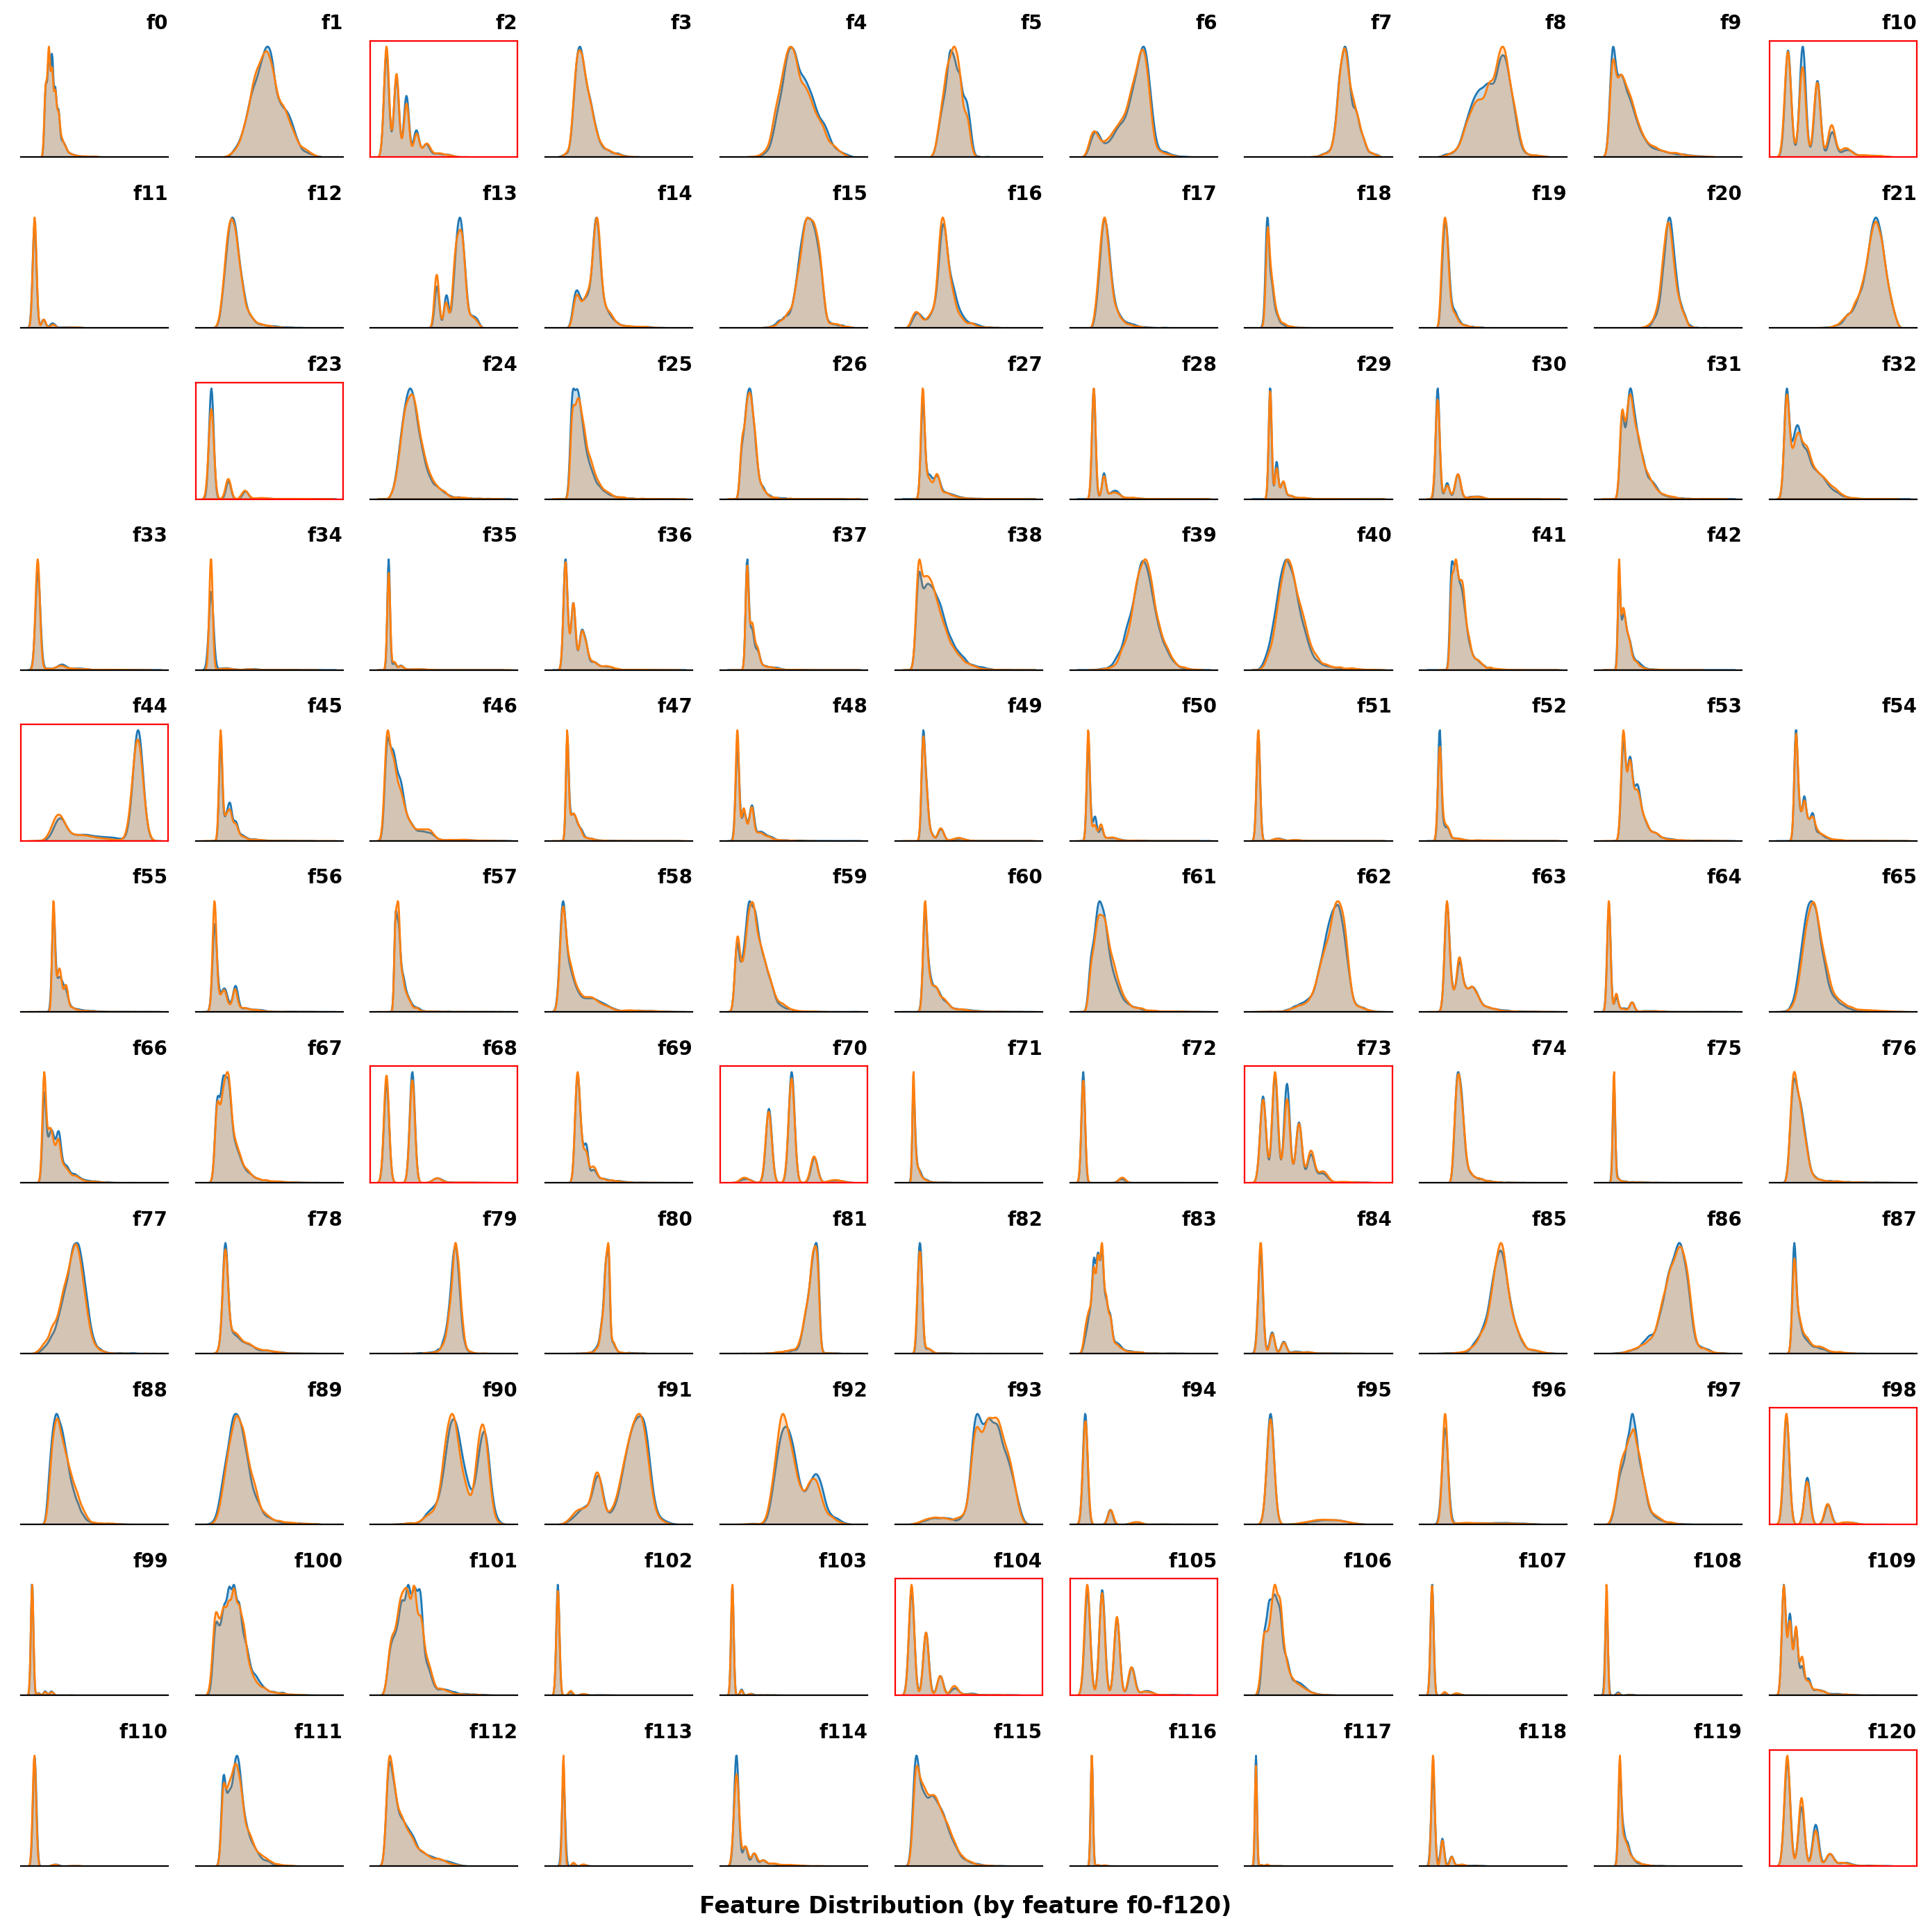

In [ ]:
fig, axes = plt.subplots(11,11,figsize=(14, 14))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    if idx in [22, 43]:
        ax.axis("off")
        continue
    sns.kdeplot(data=train, x=f'f{idx}',
                fill=True,
                ax=ax)
    sns.kdeplot(data=test, x=f'f{idx}',
                fill=True,
                ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    if f'f{idx}' in features:
        ax.spines[:].set_visible(True)
        ax.spines[:].set_color('red')
    ax.set_title(f'f{idx}', loc='right', weight='bold', fontsize=10)

fig.supxlabel('Feature Distribution (by feature f0-f120)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

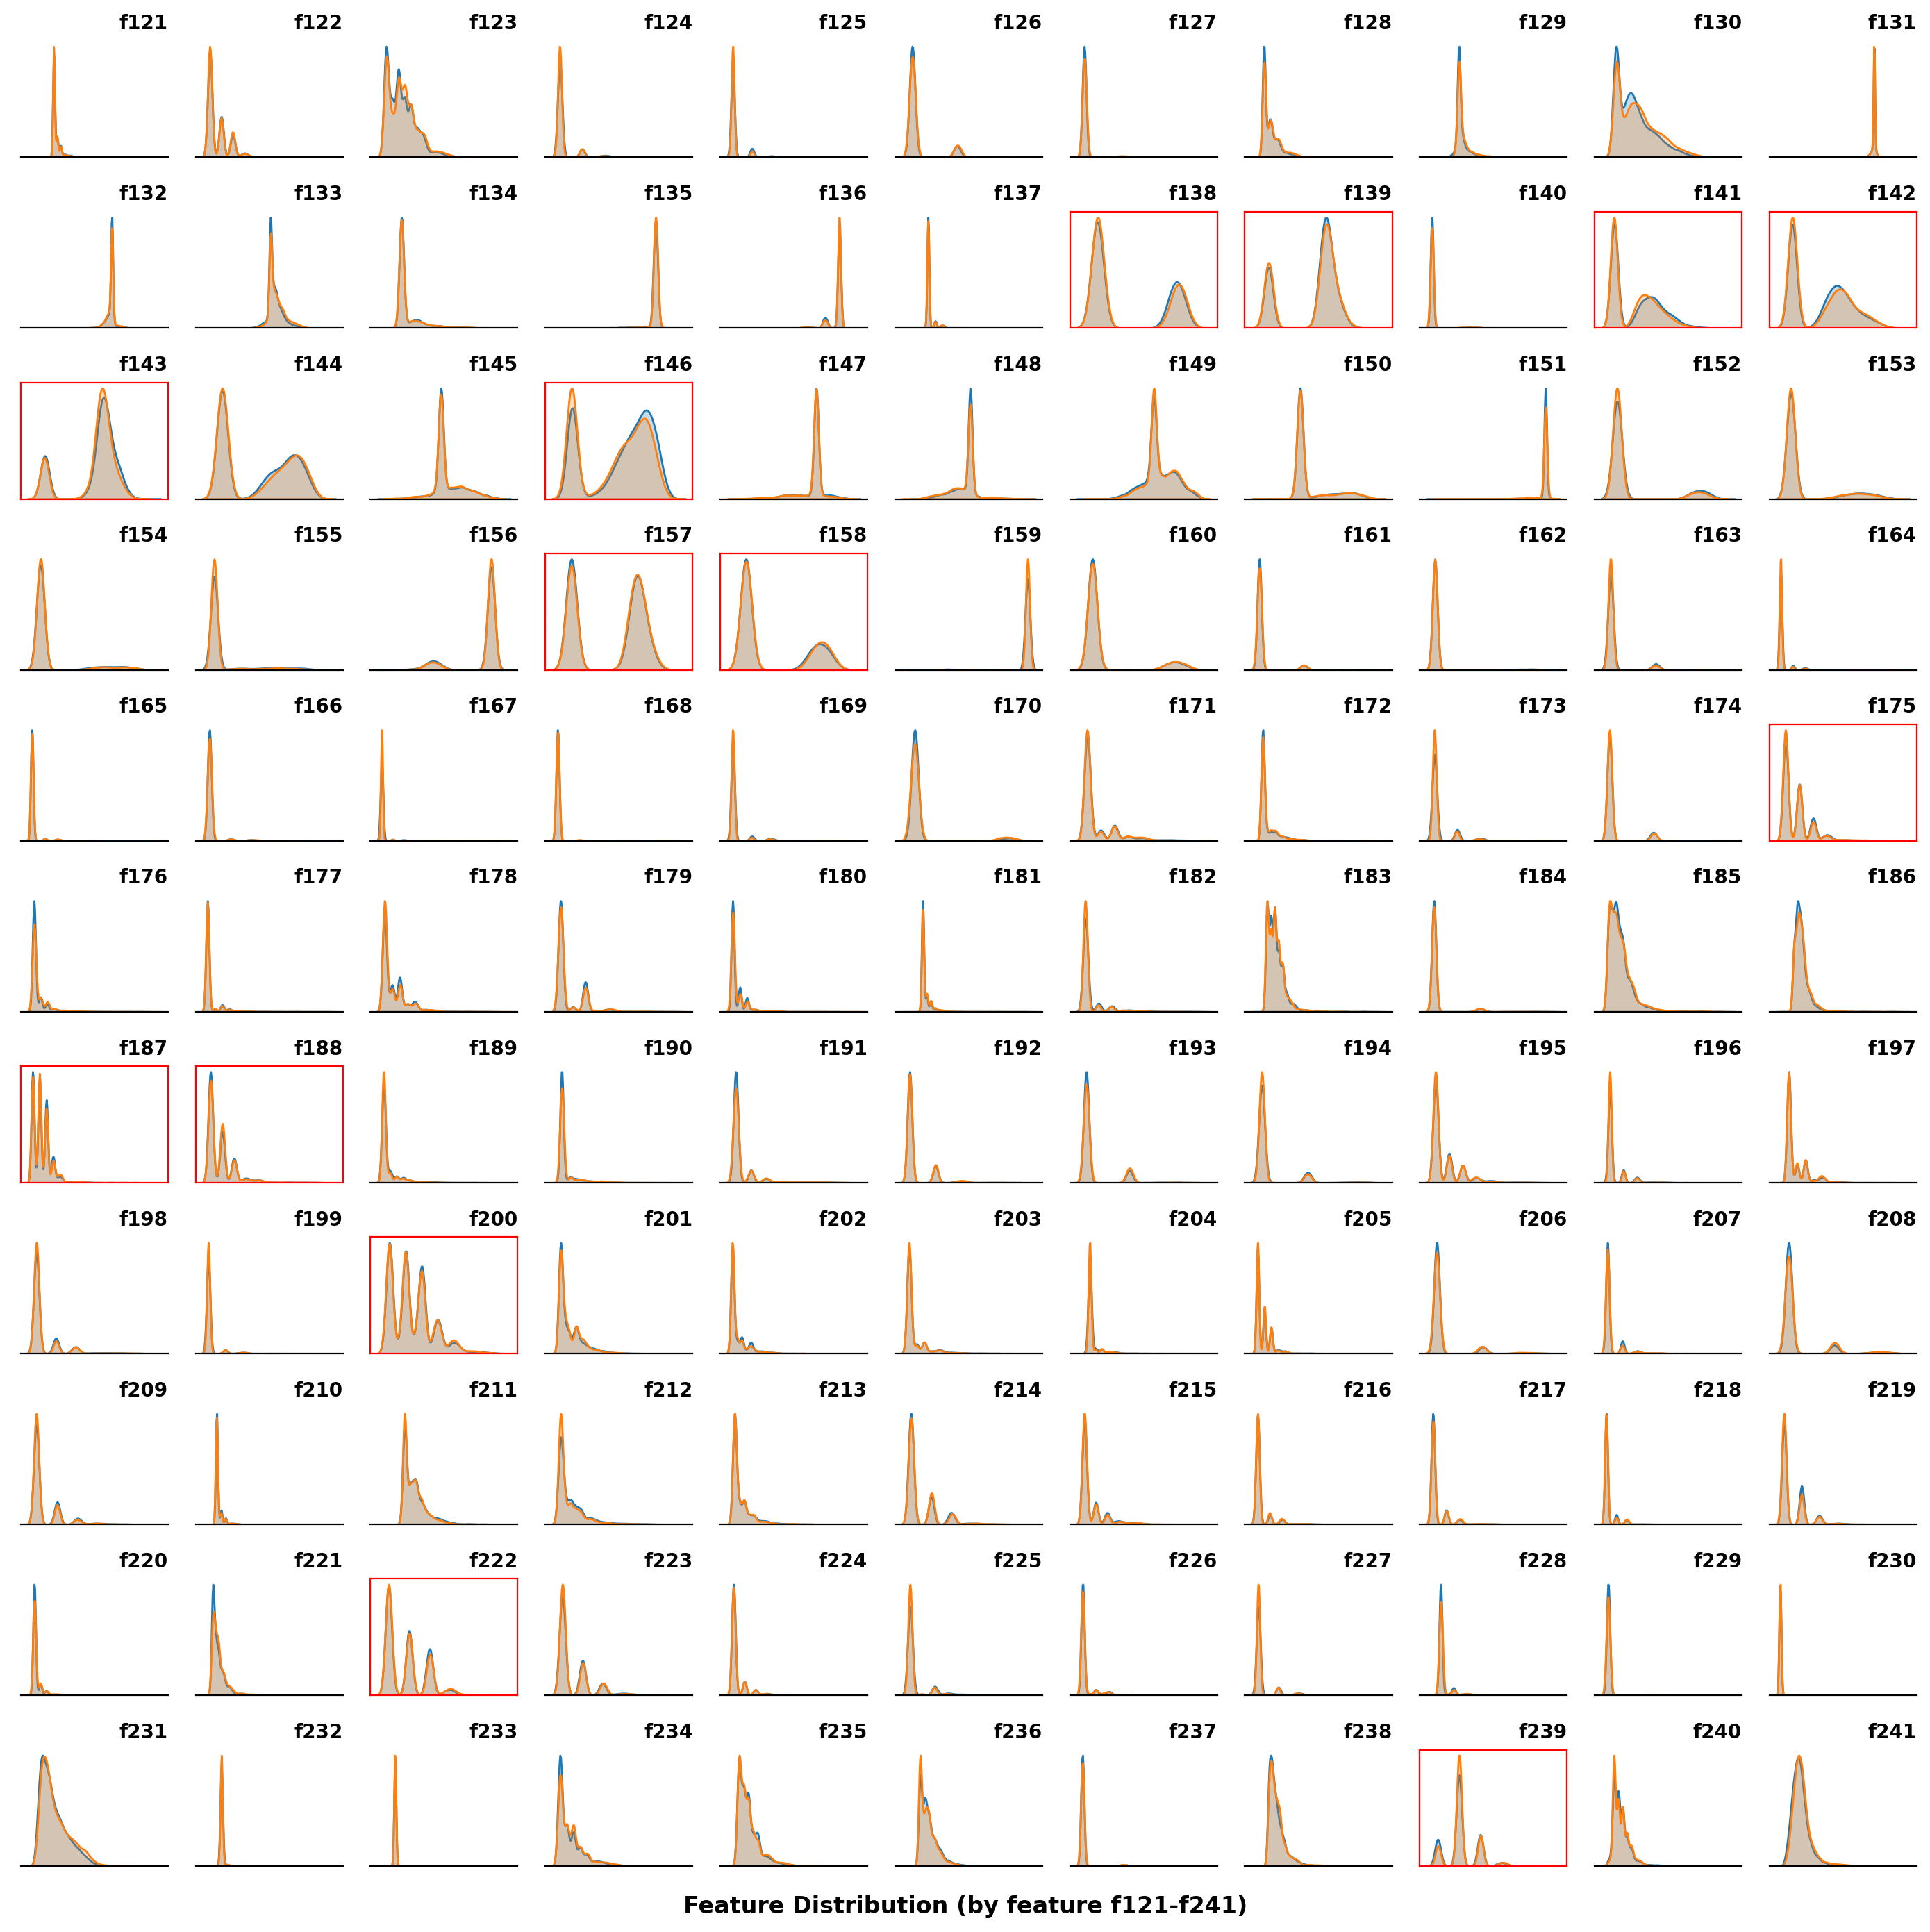

In [ ]:
fig, axes = plt.subplots(11,11,figsize=(14, 14))
axes = axes.flatten()

for idx, ax in enumerate(axes, 121):
    if idx in [22, 43]:
        ax.axis("off")
        continue
    sns.kdeplot(data=train, x=f'f{idx}',
                fill=True,
                ax=ax)
    sns.kdeplot(data=test, x=f'f{idx}',
                fill=True,
                ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    if f'f{idx}' in features:
        ax.spines[:].set_visible(True)
        ax.spines[:].set_color('red')
    ax.set_title(f'f{idx}', loc='right', weight='bold', fontsize=10)

fig.supxlabel('Feature Distribution (by feature f121-f241)', ha='center', fontweight='bold')

fig.tight_layout()
plt.show()

- The distribution of train and test is similar.
- There are various types of data distribution. Think about what the reason might be.

## Binary Feature



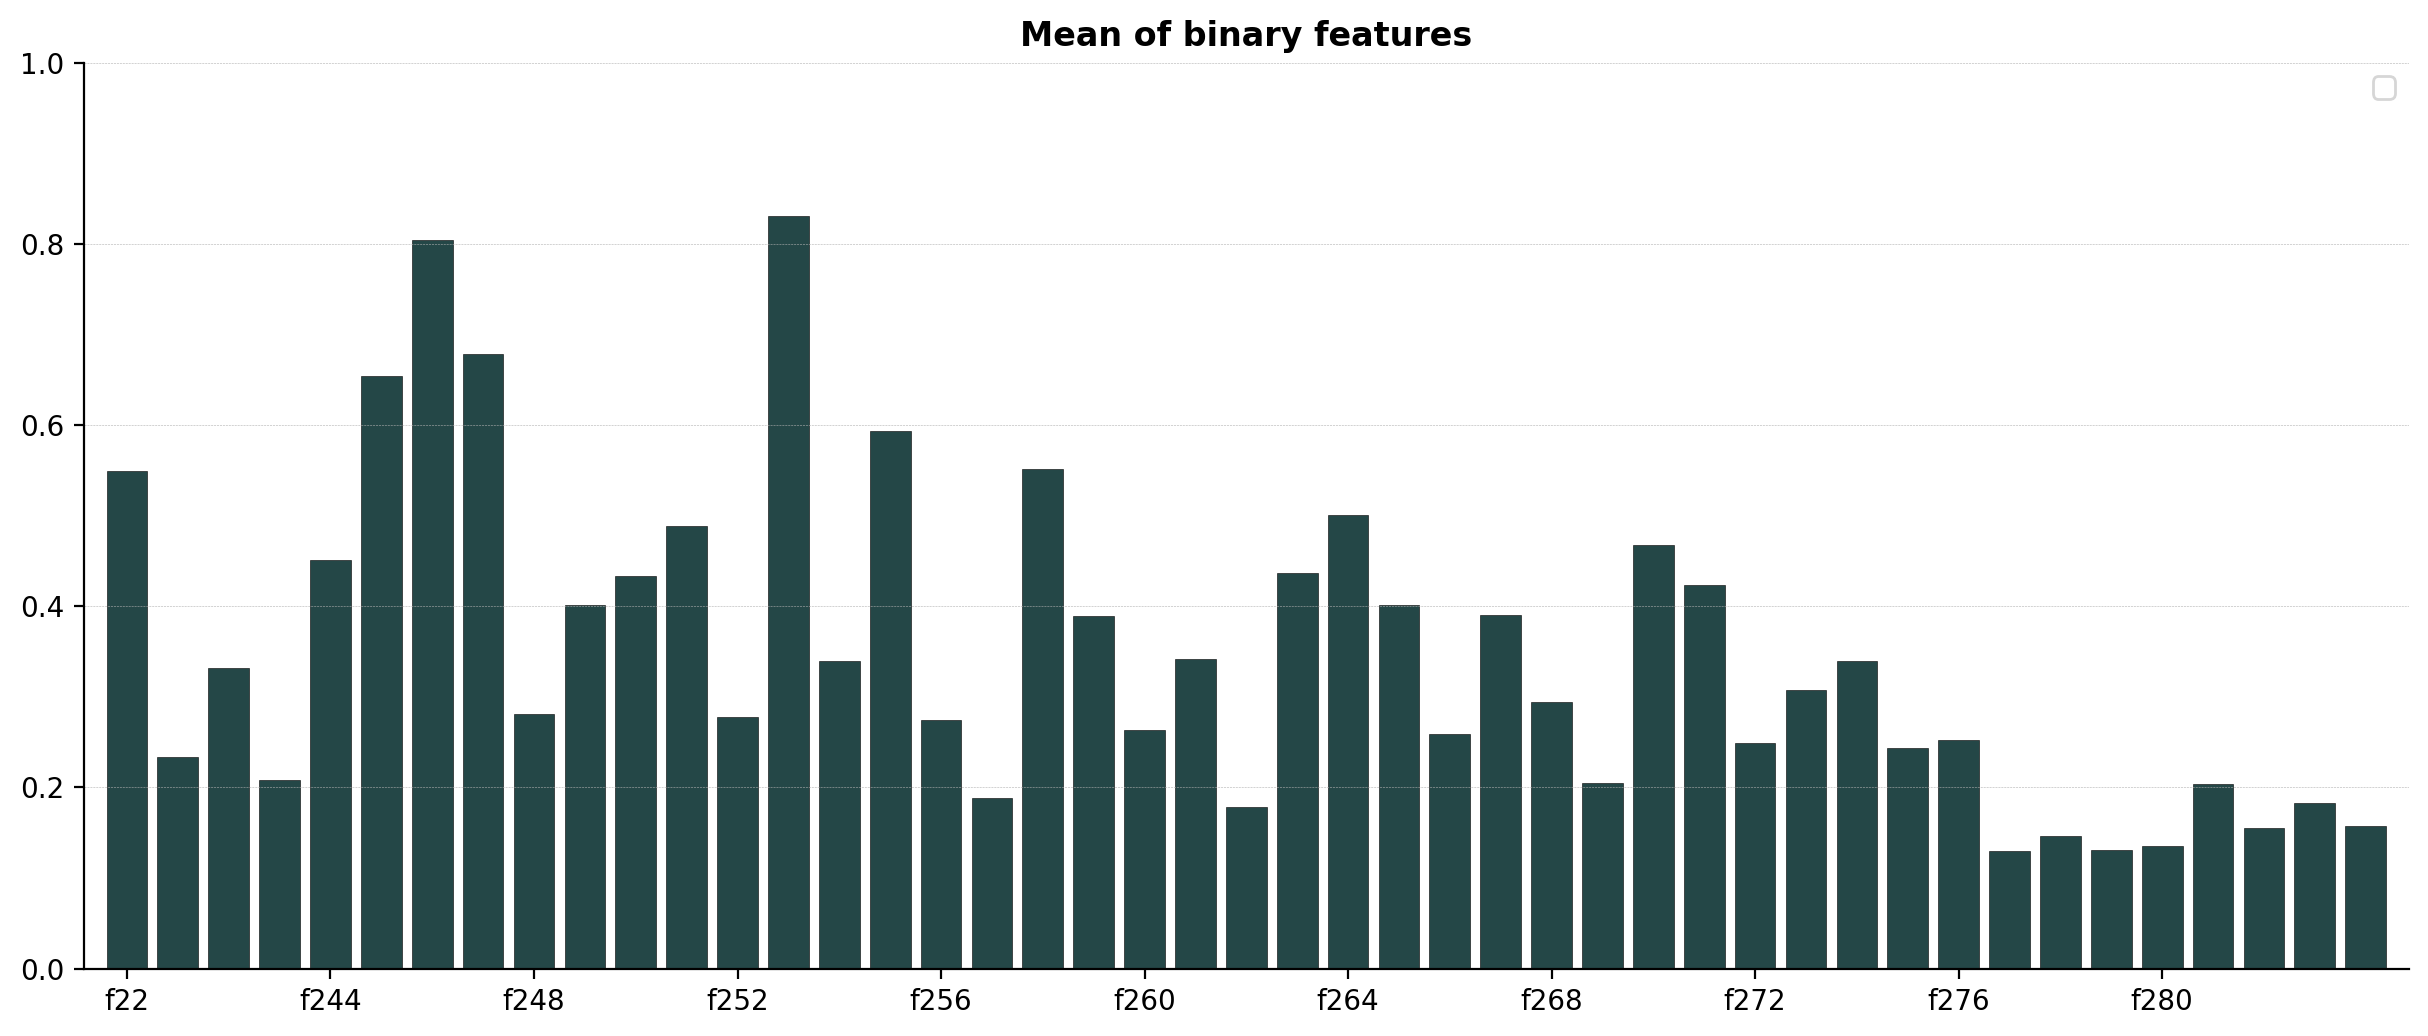

In [ ]:
binary_mean = train.loc[:,['f22', 'f43']+[f'f{i}' for i in range(242, 285)]].mean()

fig, ax = plt.subplots(1, 1, figsize=(15, 6))

ax.bar(binary_mean.index, binary_mean, linewidth=0.2, edgecolor='black', alpha=1, color='#244747')

ax.set_ylim(0, 1)
ax.set_xticks(range(0, 44, 4))
ax.margins(0.01)
ax.grid(axis='y', linestyle='--', linewidth=0.2, zorder=5)
ax.set_title('Mean of binary features', loc='center', fontweight='bold')
ax.legend()
plt.show()